In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Visualize the dataset

Target labels:  [9 4 3 2 6 6 2 8 2 9]


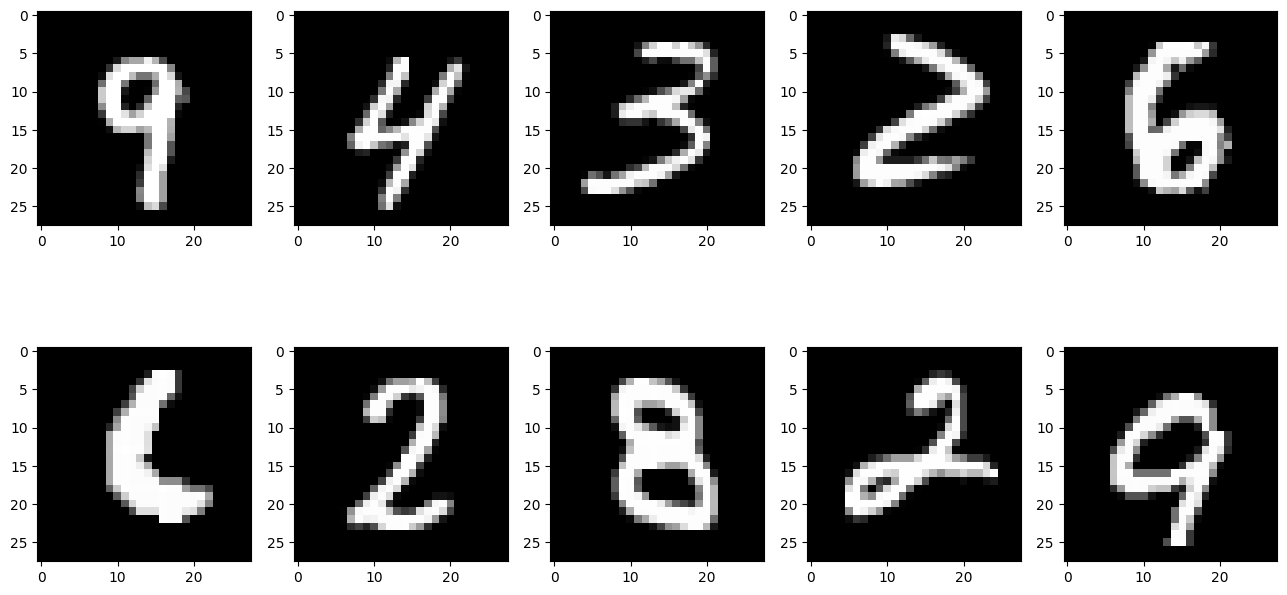

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [5]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [7]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8503 - loss: 0.5031
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9583 - loss: 0.1385
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9710 - loss: 0.0924
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9777 - loss: 0.0715
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9815 - loss: 0.0589
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9849 - loss: 0.0472
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9869 - loss: 0.0397
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9900 - loss: 0.0328
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9909 - loss: 0.0284
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9907 - loss: 0.0274


Plot the loss and accuracy graphs

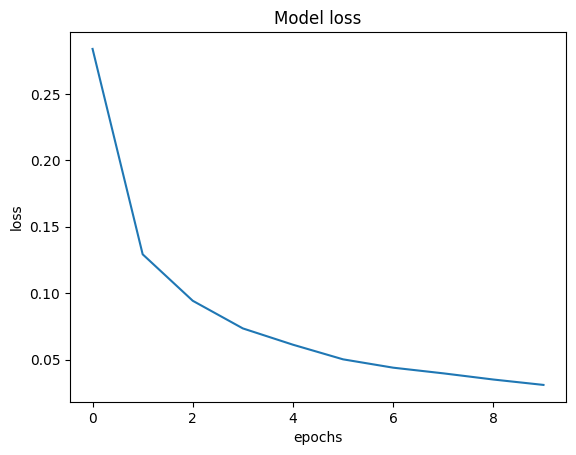

In [8]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

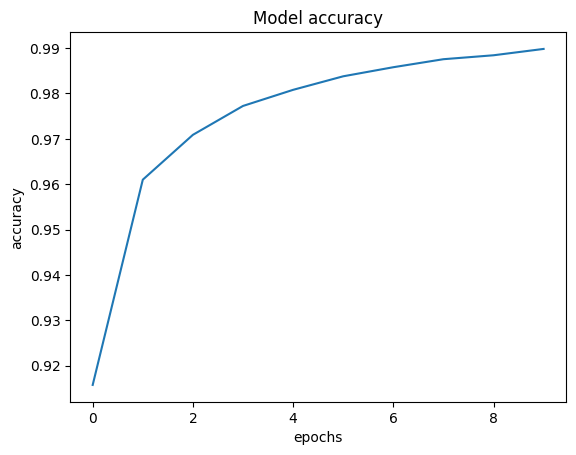

In [9]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [10]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9658 - loss: 0.1331
Loss of the Test dataset is: 0.11100824922323227
Accuracy of the test dataset is: 0.9714999794960022


Save the model weights

In [11]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')


Improve the test accuracy of the model by changing the hyperparameters.

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4720 - loss: 1.7445 - val_accuracy: 0.8978 - val_loss: 0.3816
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8980 - loss: 0.3556 - val_accuracy: 0.9313 - val_loss: 0.2449
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9288 - loss: 0.2504 - val_accuracy: 0.9458 - val_loss: 0.1976
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9440 - loss: 0.1983 - val_accuracy: 0.9512 - val_loss: 0.1749
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9527 - loss: 0.1656 - val_accuracy: 0.9544 - val_loss: 0.1566
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9560 - loss: 0.1522 - val_accuracy: 0.9562 - val_loss: 0.1490
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9597 - loss: 0.1364 - val_accuracy: 0.9585 - val_loss: 0.1378
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9659 - loss: 0.1197 - val_accu

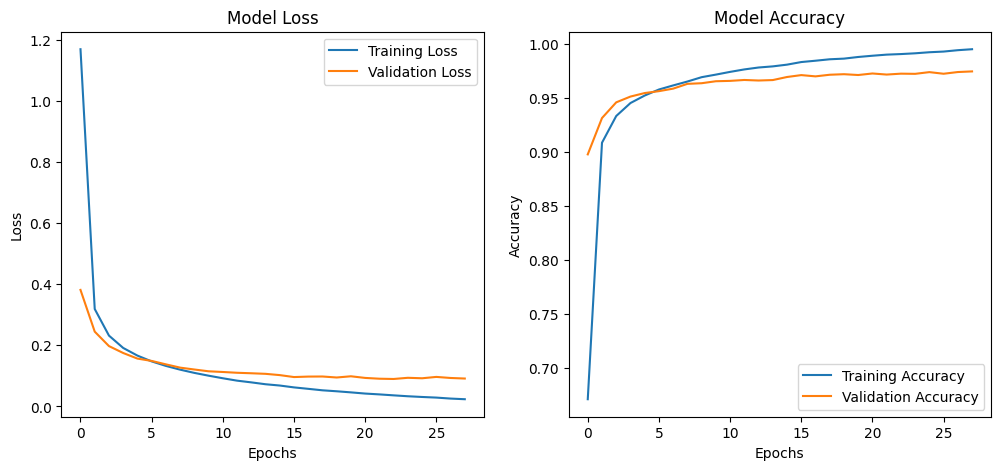

In [12]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load and preprocess the data
(train_data, train_target), (test_data, test_target) = mnist.load_data()

new_train_data = train_data / 255.0
new_test_data = test_data / 255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

# Define the improved model
improved_model = Sequential()
improved_model.add(Flatten(input_shape=(28, 28)))

# Adding more layers and neurons
improved_model.add(Dense(256, activation='relu'))
improved_model.add(Dense(256, activation='relu'))
improved_model.add(Dense(128, activation='relu'))
improved_model.add(Dense(64, activation='relu'))
improved_model.add(Dense(32, activation='relu'))
improved_model.add(Dense(10, activation='softmax'))

# Compile the model with a smaller learning rate
improved_model.compile(loss='categorical_crossentropy',
                       optimizer=Adam(learning_rate=0.0001),
                       metrics=['accuracy'])

# Adding early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with new hyperparameters
train_info = improved_model.fit(new_train_data, new_train_target,
                                epochs=50, batch_size=256, validation_split=0.2,
                                callbacks=[early_stopping])

# Evaluate the improved model
loss, acc = improved_model.evaluate(new_test_data, new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

# Plotting the loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_info.history['loss'], label='Training Loss')
plt.plot(train_info.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_info.history['accuracy'], label='Training Accuracy')
plt.plot(train_info.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.show()


Add L1 and L2 regularization terms to the model and retrain the model.

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2845 - loss: 2.1474 - val_accuracy: 0.8407 - val_loss: 0.8839
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8555 - loss: 0.7415 - val_accuracy: 0.9001 - val_loss: 0.4755
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9014 - loss: 0.4687 - val_accuracy: 0.9194 - val_loss: 0.3900
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9202 - loss: 0.3826 - val_accuracy: 0.9308 - val_loss: 0.3475
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9275 - loss: 0.3526 - val_accuracy: 0.9385 - val_loss: 0.3187
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9359 - loss: 0.3218 - val_accuracy: 0.9448 - val_loss: 0.2976
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9422 - loss: 0.2987 - val_accuracy: 0.9479 - val_loss: 0.2819
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9458 - loss: 0.2807 - val_accuracy

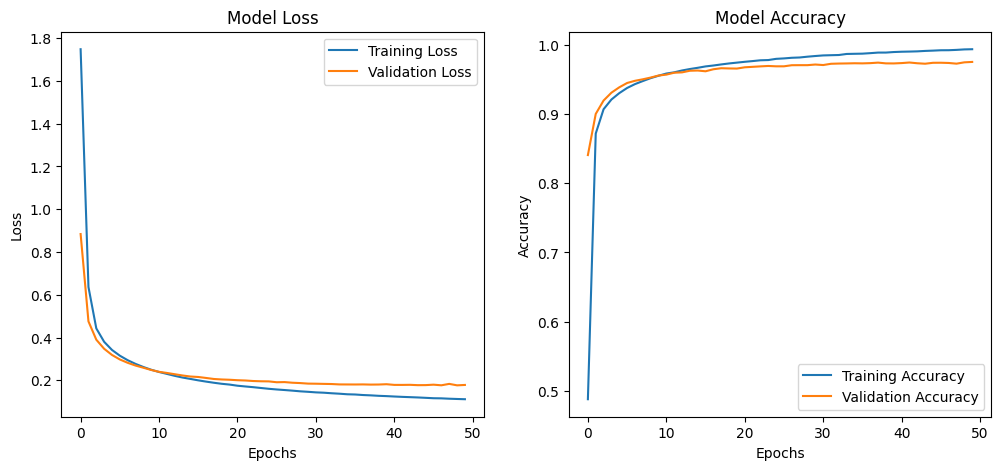

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1_l2

# Load and preprocess the data
(train_data, train_target), (test_data, test_target) = mnist.load_data()

new_train_data = train_data / 255.0
new_test_data = test_data / 255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

# Define the improved model with L1 and L2 regularization
model_with_regularization = Sequential()
model_with_regularization.add(Flatten(input_shape=(28, 28)))

# Adding layers with L1 and L2 regularization
model_with_regularization.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model_with_regularization.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model_with_regularization.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model_with_regularization.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model_with_regularization.add(Dense(10, activation='softmax', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))

# Compile the model with a smaller learning rate
model_with_regularization.compile(loss='categorical_crossentropy',
                                  optimizer=Adam(learning_rate=0.0001),
                                  metrics=['accuracy'])

# Adding early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with new hyperparameters
train_info = model_with_regularization.fit(new_train_data, new_train_target,
                                           epochs=50, batch_size=256, validation_split=0.2,
                                           callbacks=[early_stopping])

# Evaluate the improved model
loss, acc = model_with_regularization.evaluate(new_test_data, new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

# Plotting the loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_info.history['loss'], label='Training Loss')
plt.plot(train_info.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_info.history['accuracy'], label='Training Accuracy')
plt.plot(train_info.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.show()


Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3419 - loss: 2.0726 - val_accuracy: 0.8568 - val_loss: 0.7388
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8610 - loss: 0.6571 - val_accuracy: 0.9066 - val_loss: 0.4529
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9056 - loss: 0.4483 - val_accuracy: 0.9228 - val_loss: 0.3794
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9202 - loss: 0.3845 - val_accuracy: 0.9333 - val_loss: 0.3408
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9290 - loss: 0.3453 - val_accuracy: 0.9374 - val_loss: 0.3174
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9374 - loss: 0.3146 - val_accuracy: 0.9429 - val_loss: 0.3007
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9428 - loss: 0.2950 - val_accuracy: 0.9448 - val_loss: 0.2897
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9479 - loss: 0.2767 - val_accuracy:

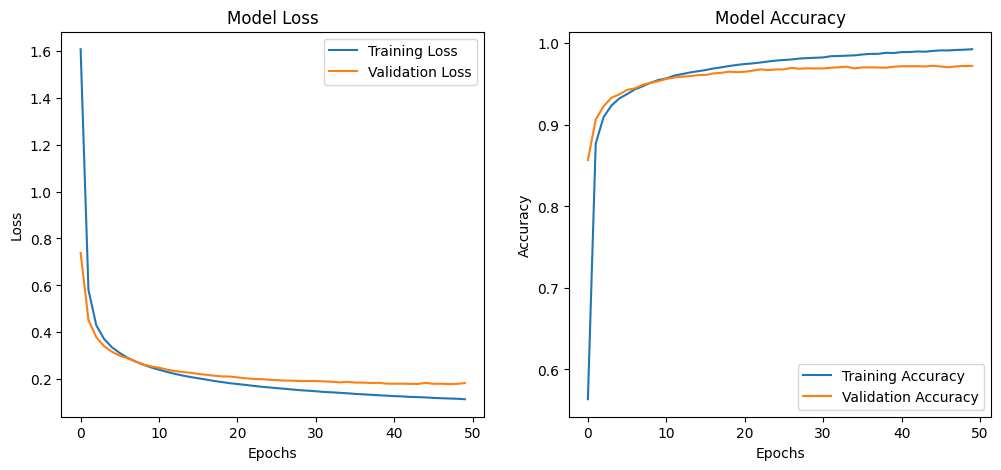

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


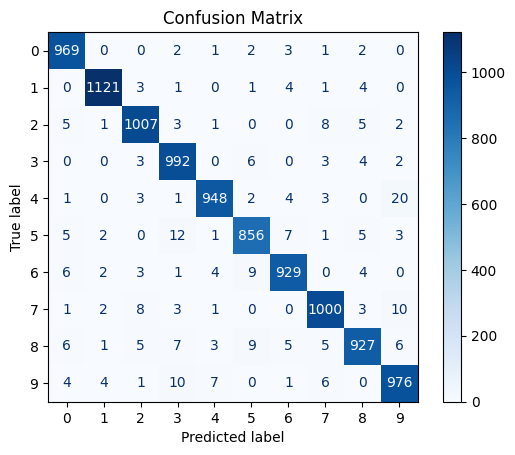

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1_l2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load and preprocess the data
(train_data, train_target), (test_data, test_target) = mnist.load_data()

new_train_data = train_data / 255.0
new_test_data = test_data / 255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

# Define the improved model with L1 and L2 regularization
model_with_regularization = Sequential()
model_with_regularization.add(Flatten(input_shape=(28, 28)))

# Adding layers with L1 and L2 regularization
model_with_regularization.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model_with_regularization.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model_with_regularization.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model_with_regularization.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model_with_regularization.add(Dense(10, activation='softmax', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))

# Compile the model with a smaller learning rate
model_with_regularization.compile(loss='categorical_crossentropy',
                                  optimizer=Adam(learning_rate=0.0001),
                                  metrics=['accuracy'])

# Adding early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with new hyperparameters
train_info = model_with_regularization.fit(new_train_data, new_train_target,
                                           epochs=50, batch_size=256, validation_split=0.2,
                                           callbacks=[early_stopping])

# Evaluate the improved model
loss, acc = model_with_regularization.evaluate(new_test_data, new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

# Plotting the loss and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_info.history['loss'], label='Training Loss')
plt.plot(train_info.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_info.history['accuracy'], label='Training Accuracy')
plt.plot(train_info.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.show()

# Generating the confusion matrix
y_pred = model_with_regularization.predict(new_test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(new_test_target, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
